In [8]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
from PIL import Image
import numpy as np
import pandas as pd


In [9]:
for dirname, _, filenames in os.walk('../Beauty/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Beauty/model1.h5
../Beauty/pa_kb.ipynb
../Beauty/test\average\001.jpg
../Beauty/test\average\002.jpg
../Beauty/test\average\003.jpg
../Beauty/test\average\004.jpg
../Beauty/test\average\005.jpg
../Beauty/test\average\006.jpg
../Beauty/test\average\007.jpg
../Beauty/test\average\008.jpg
../Beauty/test\average\009.jpg
../Beauty/test\average\010.jpg
../Beauty/test\average\011.jpg
../Beauty/test\average\012.jpg
../Beauty/test\average\013.jpg
../Beauty/test\average\014.jpg
../Beauty/test\average\015.jpg
../Beauty/test\average\016.jpg
../Beauty/test\average\017.jpg
../Beauty/test\average\018.jpg
../Beauty/test\average\019.jpg
../Beauty/test\average\020.jpg
../Beauty/test\average\021.jpg
../Beauty/test\average\022.jpg
../Beauty/test\average\023.jpg
../Beauty/test\average\024.jpg
../Beauty/test\average\025.jpg
../Beauty/test\average\026.jpg
../Beauty/test\average\027.jpg
../Beauty/test\average\028.jpg
../Beauty/test\average\029.jpg
../Beauty/test\average\030.jpg
../Beauty/test\average\031.j

In [10]:
def load_imgs(impath):
    imgs=[]
    label=[]
    l1 = os.listdir(impath)
    print("list ",l1)
    
    for i in l1:
        print("=>",i)
        l2 = os.listdir(impath+'/'+i)
        count = 0
        for j in l2:
            
            if count == 1000:
                 break
            img = Image.open(impath+i+'/'+j)
            img = img.convert('RGB')
            img =img.resize(size=(28,28))
            img = np.array(img,dtype=np.float16)/255
            
            imgs.append(np.array(img))
            #print(img.shape)
            label.append(i)
            count = count+1
            del img
    #print(list1)
    
    return np.array(imgs),label
images,labels = load_imgs("../Beauty/train/")

list  ['average', 'beautiful']
=> average
=> beautiful


In [11]:
print("type of images----> ",type(images))

type of images---->  <class 'numpy.ndarray'>


In [12]:
print("type of labels ----->",type(labels))

type of labels -----> <class 'list'>


In [13]:
print("no of images -----> ",len(images))
print("no of labels -----> ",len(labels))


no of images ----->  2000
no of labels ----->  2000


In [14]:
labels = pd.Series(labels,dtype='category')
labels

0         average
1         average
2         average
3         average
4         average
          ...    
1995    beautiful
1996    beautiful
1997    beautiful
1998    beautiful
1999    beautiful
Length: 2000, dtype: category
Categories (2, object): ['average', 'beautiful']

In [15]:
labels.value_counts()

average      1000
beautiful    1000
dtype: int64

In [16]:
labelsencoded = labels.cat.codes
labelsencoded

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Length: 2000, dtype: int8

In [17]:

d = dict(enumerate(labels.cat.categories))
print(d)   


{0: 'average', 1: 'beautiful'}


In [18]:
train_path = ("./train")
test_path = ("./test")
val_path = ("./valid")

In [19]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    batch_size=32, 
    class_mode='categorical',
    target_size=(150,150)
)

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [20]:
image, label = train_generator.next()

In [21]:
labels = ['average', 'beautiful']

In [22]:
IMG_SIZE = 50

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])


In [23]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [24]:
augmented_images = tf.expand_dims(image, 0)

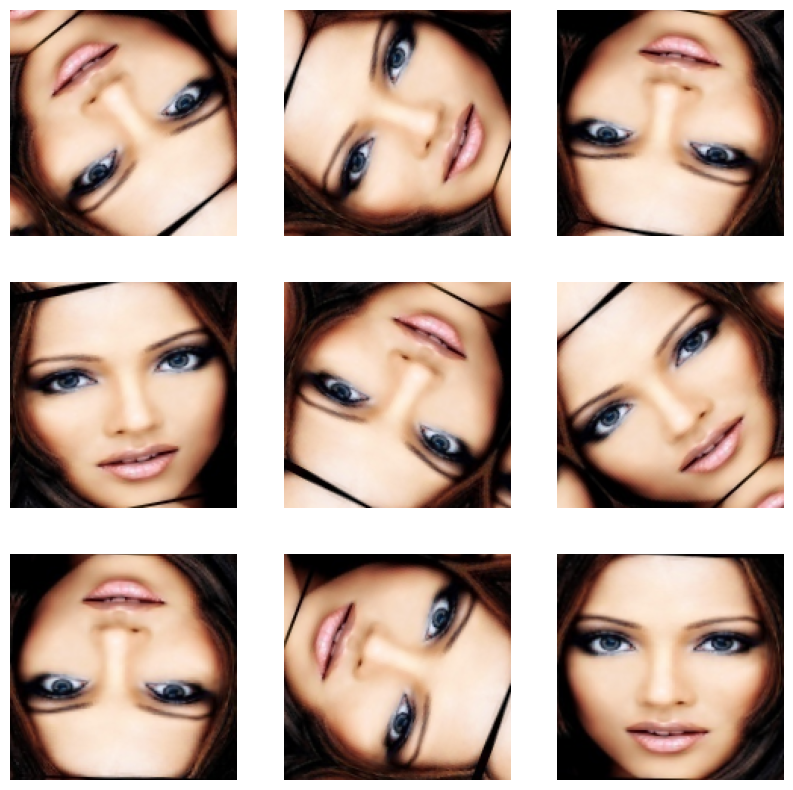

In [25]:


plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_images = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0])
  plt.axis("off")
  


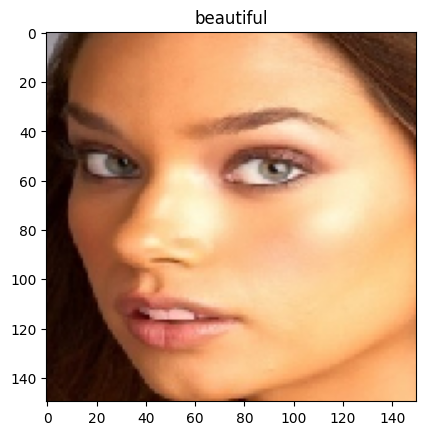

In [26]:
data = 1
plt.imshow(image[data])
plt.title(labels[tf.argmax(label[data])])
plt.show()

In [27]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)


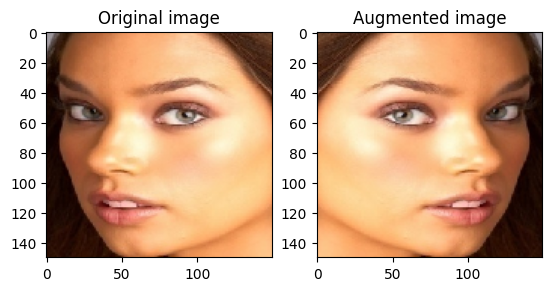

In [28]:
flipped = tf.image.flip_left_right(image[data])
visualize(image[data], flipped)

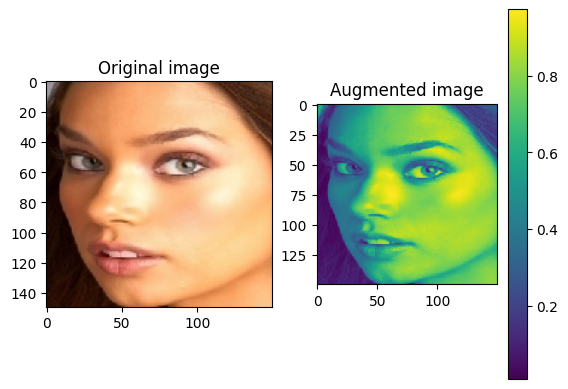

In [29]:
grayscaled = tf.image.rgb_to_grayscale(image[data])
visualize(image[data], tf.squeeze(grayscaled))
_ = plt.colorbar()

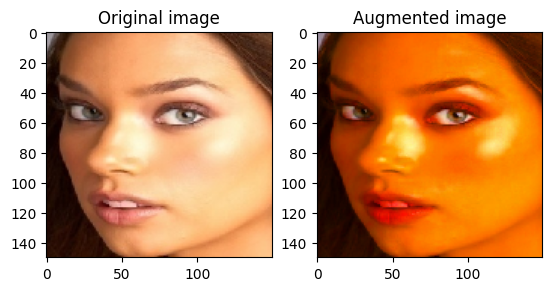

In [30]:
saturated = tf.image.adjust_saturation(image[data], 3)
visualize(image[data], saturated)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


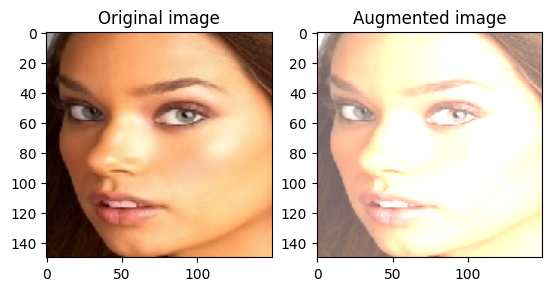

In [31]:


bright = tf.image.adjust_brightness(image[data], 0.4)
visualize(image[data], bright)



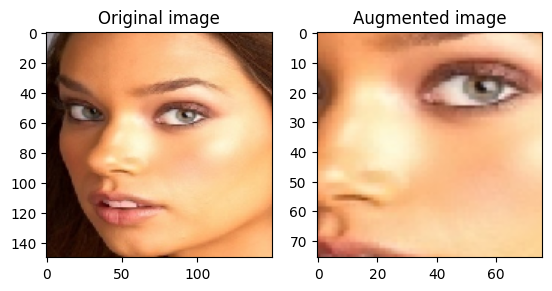

In [32]:
cropped = tf.image.central_crop(image[data], central_fraction=0.5)
visualize(image[data], cropped)

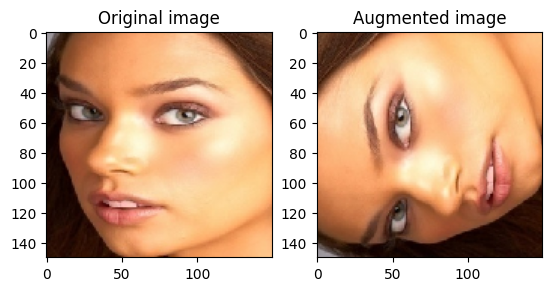

In [33]:
rotated = tf.image.rot90(image[data])
visualize(image[data], rotated)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


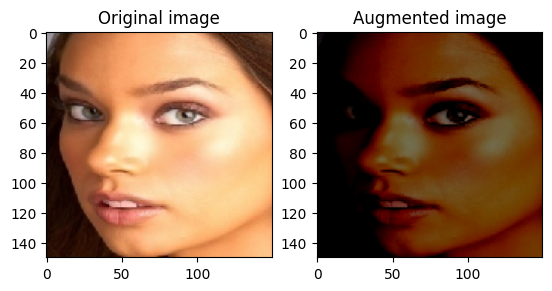

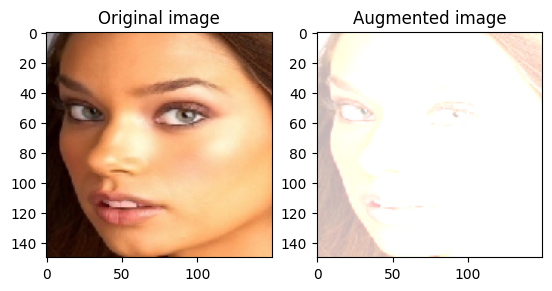

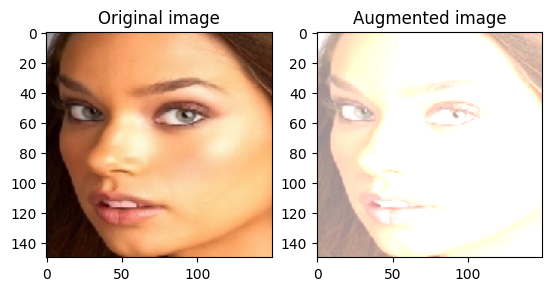

In [34]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image[data], max_delta=0.95, seed=seed)
  visualize(image[data], stateless_random_brightness)

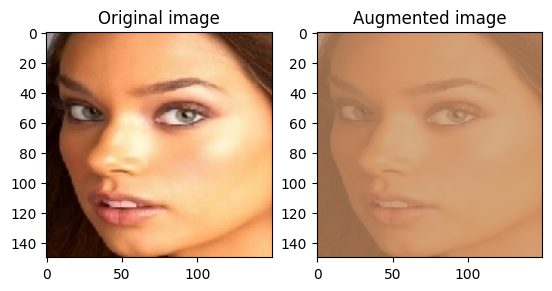

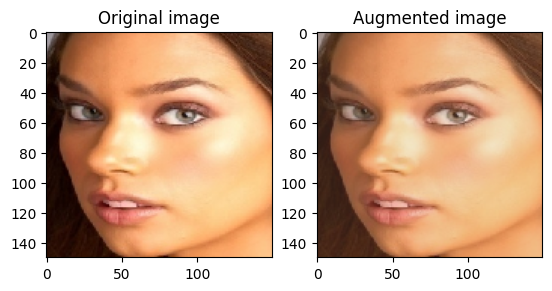

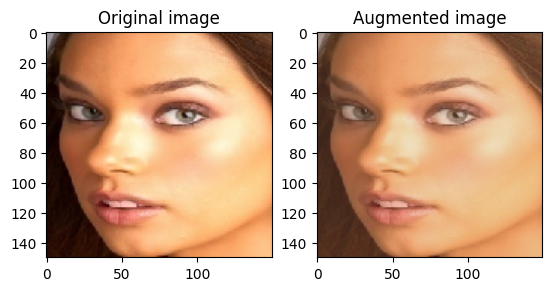

In [35]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image[data], lower=0.1, upper=0.9, seed=seed)
  visualize(image[data], stateless_random_contrast)

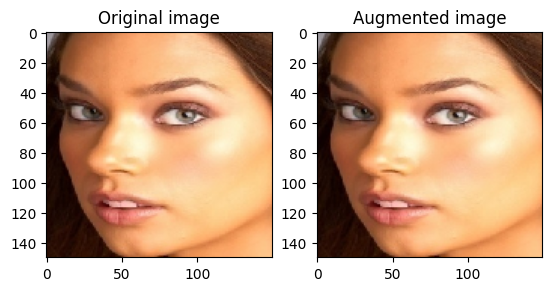

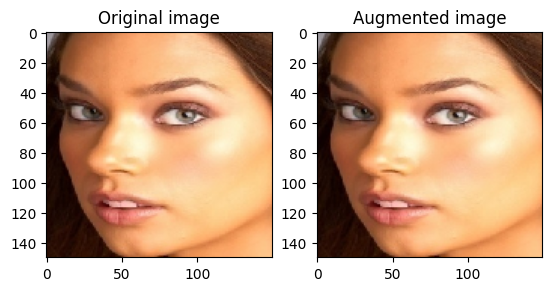

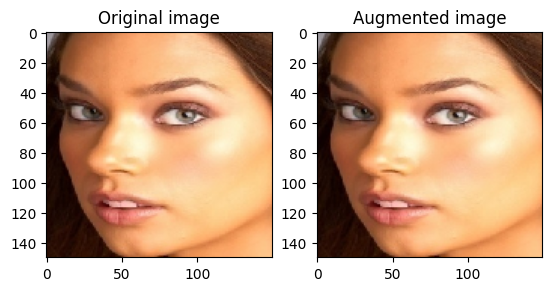

In [36]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      image[data], size=[150, 150, 3], seed=seed)
  visualize(image[data], stateless_random_crop)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')

])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)               

In [38]:
model.compile(
    optimizer= 'RMSprop',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 1e-4): #akan berhenti apabila memenuhi
            self.model.stop_training = True
            
cb = myCallback()

In [40]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data = val_generator, callbacks = cb
)

Epoch 1/10
125/125 [==============================] - 54s 422ms/step - loss: 1.0845 - accuracy: 0.6730 - val_loss: 0.4670 - val_accuracy: 0.7833
Epoch 2/10
125/125 [==============================] - 52s 417ms/step - loss: 0.4593 - accuracy: 0.8058 - val_loss: 0.4562 - val_accuracy: 0.8033
Epoch 3/10
125/125 [==============================] - 52s 415ms/step - loss: 0.3778 - accuracy: 0.8485 - val_loss: 0.3378 - val_accuracy: 0.8833
Epoch 4/10
125/125 [==============================] - 52s 415ms/step - loss: 0.3107 - accuracy: 0.8695 - val_loss: 0.4246 - val_accuracy: 0.8367
Epoch 5/10
125/125 [==============================] - 52s 414ms/step - loss: 0.2484 - accuracy: 0.8982 - val_loss: 0.3293 - val_accuracy: 0.8833
Epoch 6/10
125/125 [==============================] - 52s 417ms/step - loss: 0.2124 - accuracy: 0.9220 - val_loss: 0.3304 - val_accuracy: 0.8567
Epoch 7/10
125/125 [==============================] - 105s 842ms/step - loss: 0.1540 - accuracy: 0.9425 - val_loss: 0.4448 - val_a

In [41]:
#train
y_acctrain = history.history['accuracy']
y_accval = history.history['val_accuracy']

#validation
y_losstrain = history.history['loss']
y_lossval = history.history['val_loss']

#epoch
x_ = range(len(y_acctrain))

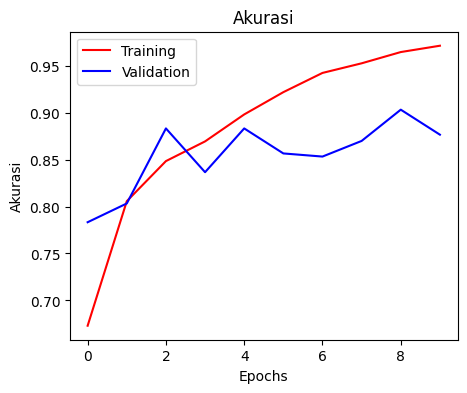

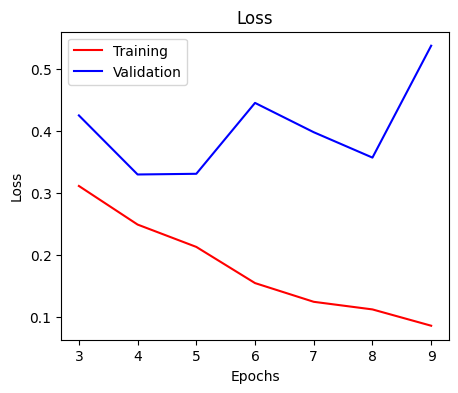

In [42]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acctrain, c='r', label='Training')
plt.plot(x_, y_accval, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_losstrain[3:], c='r', label='Training')
plt.plot(x_[3:], y_lossval[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
model.evaluate(val_generator)

10/10 [==============================] - 1s 86ms/step - loss: 0.5371 - accuracy: 0.8767


[0.5371478199958801, 0.8766666650772095]

In [44]:
model.evaluate(test_generator)

10/10 [==============================] - 1s 85ms/step - loss: 0.3380 - accuracy: 0.9067


[0.3380221426486969, 0.9066666960716248]

In [45]:
result = model.predict(val_generator)
print(result)

10/10 [==============================] - 1s 85ms/step
[[9.99953628e-01 4.63451652e-05]
 [1.23330101e-04 9.99876618e-01]
 [8.59395694e-03 9.91406083e-01]
 [5.20383358e-01 4.79616582e-01]
 [1.13112894e-12 1.00000000e+00]
 [3.41111332e-01 6.58888638e-01]
 [9.96059775e-01 3.94024933e-03]
 [2.91812324e-10 1.00000000e+00]
 [3.45711596e-05 9.99965429e-01]
 [9.97177362e-01 2.82264501e-03]
 [8.03604738e-10 1.00000000e+00]
 [8.63126099e-01 1.36873841e-01]
 [9.99999642e-01 4.07839849e-07]
 [9.18459833e-01 8.15400854e-02]
 [1.82607891e-07 9.99999762e-01]
 [2.06120785e-06 9.99997973e-01]
 [5.76113098e-06 9.99994278e-01]
 [1.03877588e-04 9.99896169e-01]
 [1.05139595e-02 9.89485979e-01]
 [9.94409025e-01 5.59096923e-03]
 [9.69043672e-01 3.09563726e-02]
 [8.73369259e-12 1.00000000e+00]
 [9.99996901e-01 3.10366954e-06]
 [1.30541338e-07 9.99999881e-01]
 [5.94450867e-13 1.00000000e+00]
 [1.28165752e-01 8.71834278e-01]
 [1.23452948e-04 9.99876499e-01]
 [6.77859306e-01 3.22140664e-01]
 [1.59663625e-08 1.000

In [46]:
result1 = model.predict(test_generator)
print(result1)

10/10 [==============================] - 1s 94ms/step
[[2.26277916e-05 9.99977350e-01]
 [2.10724063e-17 1.00000000e+00]
 [9.93530571e-01 6.46941131e-03]
 [4.84717864e-04 9.99515295e-01]
 [5.83475976e-13 1.00000000e+00]
 [9.99147296e-01 8.52648693e-04]
 [5.66627800e-01 4.33372259e-01]
 [2.22530510e-08 1.00000000e+00]
 [1.07131019e-01 8.92868996e-01]
 [1.78298265e-01 8.21701705e-01]
 [2.69244378e-03 9.97307539e-01]
 [1.26945751e-03 9.98730481e-01]
 [9.85885978e-01 1.41140725e-02]
 [1.19720726e-05 9.99988079e-01]
 [6.09904710e-05 9.99938965e-01]
 [7.57214189e-01 2.42785841e-01]
 [3.46112385e-04 9.99653935e-01]
 [3.79084458e-10 1.00000000e+00]
 [1.07240909e-16 1.00000000e+00]
 [6.34646334e-04 9.99365389e-01]
 [3.65303422e-05 9.99963522e-01]
 [1.37734707e-04 9.99862194e-01]
 [9.97226962e-05 9.99900222e-01]
 [4.61189047e-05 9.99953866e-01]
 [8.97366285e-01 1.02633648e-01]
 [1.69341714e-08 1.00000000e+00]
 [1.79262757e-02 9.82073784e-01]
 [4.09319982e-05 9.99959111e-01]
 [1.56200840e-04 9.998

In [47]:
result2 = model.predict(train_generator)
print(result2)

125/125 [==============================] - 11s 89ms/step
[[2.3362294e-05 9.9997663e-01]
 [9.9342656e-01 6.5733977e-03]
 [1.2043759e-05 9.9998796e-01]
 ...
 [9.4067514e-01 5.9324834e-02]
 [1.0525110e-03 9.9894756e-01]
 [9.9990916e-01 9.0811576e-05]]


In [48]:
model.save('model1.h5')